  Напишем модель линейной регрессии для предсказывания цены на биткойн.
  Для этого воспользуемся датасетом bitcoin.csv. 

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # для разбивки выборки на тренировочную и тестовую
import numpy as np

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Считаем датасет

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitcoin_regr/bitcoin.csv')

In [ ]:
data

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


Удалим столбец unnamed

In [ ]:
data = data.iloc[:, 1:]

In [ ]:
data

,time,high,low,open,volumefrom,volumeto,close
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


Будем предсказывать цену закрытия через 14 дней. Для этого создадим столбец predict. Получается что для последних 14 значений датасета predict будет неизвестен. 

In [ ]:
delta = 14
data['predict'] = data['close'].shift(-delta)
data

,time,high,low,open,volumefrom,volumeto,close,predict
0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78,430.70
1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59,433.32
2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03,431.20
3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43,430.82
4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98,457.05
...,...,...,...,...,...,...,...,...
1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,NaN
1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38,NaN
1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58,NaN
1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78,NaN


Сначала построем простую модель регрессии с одним нецелевым признаком 'close'. После этого увеличим количество нецелевых признаков и сравним результат

In [ ]:
X = data[['close']]
Y = data[['predict']]

Не учитываем 14 последних строк в датасете

In [ ]:
X = X[:-delta]
Y = Y[:-delta]

Делим на тренировочную и тестовую выборку

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
model.score(X_test, Y_test)

0.9553708871365949

Точность обучения 95%. Теперь предскажем значения

In [ ]:
model.predict(data[['close']][-delta:])

array([[34547.03723837],
       [35585.78243465],
       [37195.02162209],
       [36594.7887674 ],
       [37477.83238308],
       [39111.22636695],
       [36770.70170589],
       [35463.04167488],
       [35720.17561054],
       [33530.32192803],
       [33358.86635991],
       [37294.59591588],
       [36592.09062524],
       [36752.74374144]])

In [ ]:
data[['close']][-delta:]

,close
1987,34611.58
1988,35662.59
1989,37290.83
1990,36683.51
1991,37576.98
1992,39229.66
1993,36861.50
1994,35538.40
1995,35798.57
1996,33582.86


Таким образом мы получили предсказанные цены закрытия через 14 дней, для последних 14 строк датасета.
Попробуем предсказать при помощи своей реализации модели линейной регрессии

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitcoin_regr/bitcoin.csv')
data

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


По сути столбец time не несет никакой роли, поэтому удалим его

In [ ]:
data = data.iloc[:, 2:]
data

,high,low,open,volumefrom,volumeto,close
0,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


Теперь напишем класс LinReg

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # для разбивки выборки на тренировочную и тестовую
import numpy as np

In [79]:
class LinReg:
    def __init__(self, eta=0.05, n_iterations=1000):
        self.eta = eta # скорость градиентного спуска
        self.n_iterations = n_iterations # количество итераций 

    def fit(self, x, y):
        self.w = np.zeros((x.shape[1], 1)) # нулевой столбец элементов
        for _ in range(self.n_iterations):
            y_pred = np.dot(x, self.w) # предсказываем значения целевого признака
            different = y_pred - y
            gradient_vector = np.dot(x.T, different)
            self.w = self.w - (self.eta / x.shape[0]) * gradient_vector # считаем значения коэффициентов
        return self

    def predict(self, x):
        return np.dot(x, self.w)
      

Напишем функцию, которая масштабирует все признаки к единому нулевому значению и единичному отклонению

In [ ]:
def standard_scaler(x):
    mean = x - np.mean(x, axis=0)
    return mean / np.std(x)

Подготовим данные:

In [65]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bitcoin_regr/bitcoin.csv')
data = data.drop(['Unnamed: 0', 'time'], axis=1)
data

,high,low,open,volumefrom,volumeto,close
0,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


In [66]:
delta = 14
data['predict'] = data['close'].shift(-delta)

In [67]:
data

,high,low,open,volumefrom,volumeto,close,predict
0,462.76,431.10,461.20,121531.64,5.431648e+07,441.78,430.70
1,445.54,423.99,441.78,121990.88,5.327022e+07,437.59,433.32
2,443.22,433.25,437.59,65785.54,2.884554e+07,437.03,431.20
3,444.78,434.28,437.03,63247.04,2.787735e+07,442.43,430.82
4,460.62,441.76,442.43,79604.01,3.609666e+07,452.98,457.05
...,...,...,...,...,...,...,...
1996,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86,NaN
1997,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38,NaN
1998,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58,NaN
1999,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78,NaN


In [68]:
X = data.iloc[:, :-1]
Y = data[['predict']]
X = X[:-delta]
Y = Y[:-delta]

In [69]:
X = standard_scaler(X)
X

,high,low,open,volumefrom,volumeto,close
0,-0.714865,-0.720157,-0.715440,1.047782,-0.597029,-0.717726
1,-0.716230,-0.720764,-0.717031,1.056770,-0.598150,-0.718069
2,-0.716414,-0.719974,-0.717375,-0.043253,-0.624326,-0.718115
3,-0.716290,-0.719886,-0.717421,-0.092936,-0.625364,-0.717673
4,-0.715034,-0.719248,-0.716978,0.227195,-0.616555,-0.716809
...,...,...,...,...,...,...
1982,2.414988,2.183356,2.090969,0.758779,3.611707,2.424570
1983,2.406867,2.357532,2.428577,-0.028670,2.055708,2.387709
1984,2.487083,2.472417,2.391678,-0.029591,2.139505,2.461997
1985,2.451739,2.417482,2.466044,-0.421197,1.278153,2.400106


Самое главное добавить в X, столбец единиц. Это необходимо, чтобы мы избавились от свободного коэффициента в формуле функции регрессии.

In [70]:
X.insert(0, 'const', 1)

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [80]:
model = LinReg()
model.fit(X_train, Y_train)

Сейчас есть обученная модель, давайте посчитаем score, как сделали в предыдущем случае

In [83]:
pred = model.predict(X_train)
RSS = ((Y_train - pred) ** 2).sum()
TSS = ((Y_train - pred.mean()) ** 2).sum()
score = 1 - RSS / TSS
score

predict    0.947239
dtype: float64

Точность модели упала, но всего лишь на 1%. Теперь осталось самое главное: предсказать значения для последних 14 дней и сравнить с результатом в предыдущем случае

In [95]:
x = data.drop('predict', axis=1)
x = standard_scaler(x)
x.insert(0, 'ones', 1)
x

,ones,high,low,open,volumefrom,volumeto,close
0,1,-0.720616,-0.725919,-0.721223,1.052869,-0.603833,-0.723467
1,1,-0.721963,-0.726517,-0.722793,1.061881,-0.604950,-0.723805
2,1,-0.722145,-0.725738,-0.723132,-0.041099,-0.631020,-0.723850
3,1,-0.722023,-0.725651,-0.723177,-0.090914,-0.632054,-0.723414
4,1,-0.720784,-0.725021,-0.722741,0.230077,-0.623281,-0.722562
...,...,...,...,...,...,...,...
1996,1,2.120546,2.047077,2.135529,-0.307515,1.313202,1.952789
1997,1,1.907089,1.850673,1.956406,0.404334,2.423295,1.938780
1998,1,2.178267,1.968613,1.942381,0.478843,2.806746,2.260356
1999,1,2.245431,2.253681,2.264311,-0.094732,1.833879,2.202957


In [96]:
model.predict(x[-delta:])

array([[34760.49551538],
       [34216.7797905 ],
       [35538.1711247 ],
       [36060.82536263],
       [36255.8014894 ],
       [37533.24836103],
       [36868.34621215],
       [35358.63229607],
       [34727.40116406],
       [34178.16420809],
       [32959.42009837],
       [35364.36054508],
       [36548.21167538],
       [35811.18269462]])

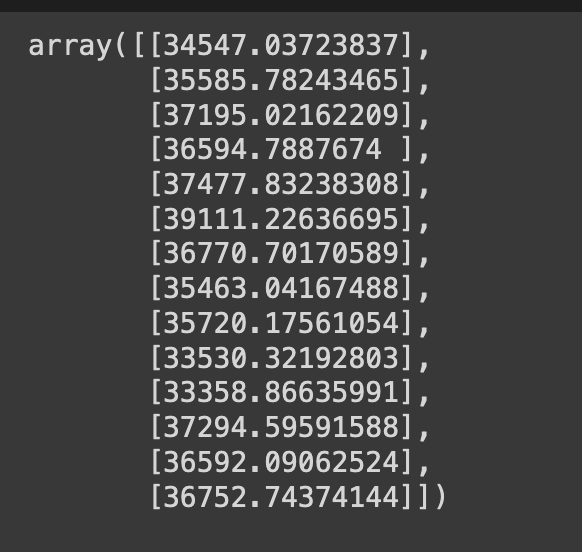